<p style = "font-size : 50px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #bedcfa; border-radius: 5px 5px;"><strong>Chronic Kidney Disease Prediction</strong></p>

<a id = '0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Table of Contents</strong></p>

* [load data](#1.0)
* [EDA](#2.0)
* [Data Pre Processing](#3.0)
* [Feature Engineering](#4.0)
* [Model Building](#5.0)
    * [Knn](#5.1)
    * [Decision Tree Classifier](#5.2)
    * [Random Forest Classifier](#5.3)
    * [Ada Boost Classifier](#5.4)
    * [Gradient Boosting Classifier](#5.5)
    * [Stochastic Gradient Boosting (SGB)](#5.6)
    * [XgBoost](#5.7)
    * [Cat Boost Classifier](#5.8)
    * [Extra Trees Classifier](#5.9)
    * [LGBM Classifier](#5.10)
* [Models Comparison](#6.0)

* [Association Rule Mining: FP-Growth Algorithm](#7.0)



# Dataset

In [ ]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

In [ ]:
# loading data

df= pd.read_csv('/datasets/kidney_disease.csv')


In [ ]:
df.shape

(400, 26)

In [ ]:
# dropping id column
df.drop('id', axis = 1, inplace = True)

In [ ]:
# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [ ]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>As we can see that 'packed_cell_volume', 'white_blood_cell_count' and 'red_blood_cell_count'  are object type. We need to change them to numerical dtype.</strong></p>

**Converting Object-Type Columns to Numerical Format**

In [ ]:
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [ ]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>There is some ambugity present in the columns we have to remove that.</strong></p>

In [ ]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [ ]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [ ]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



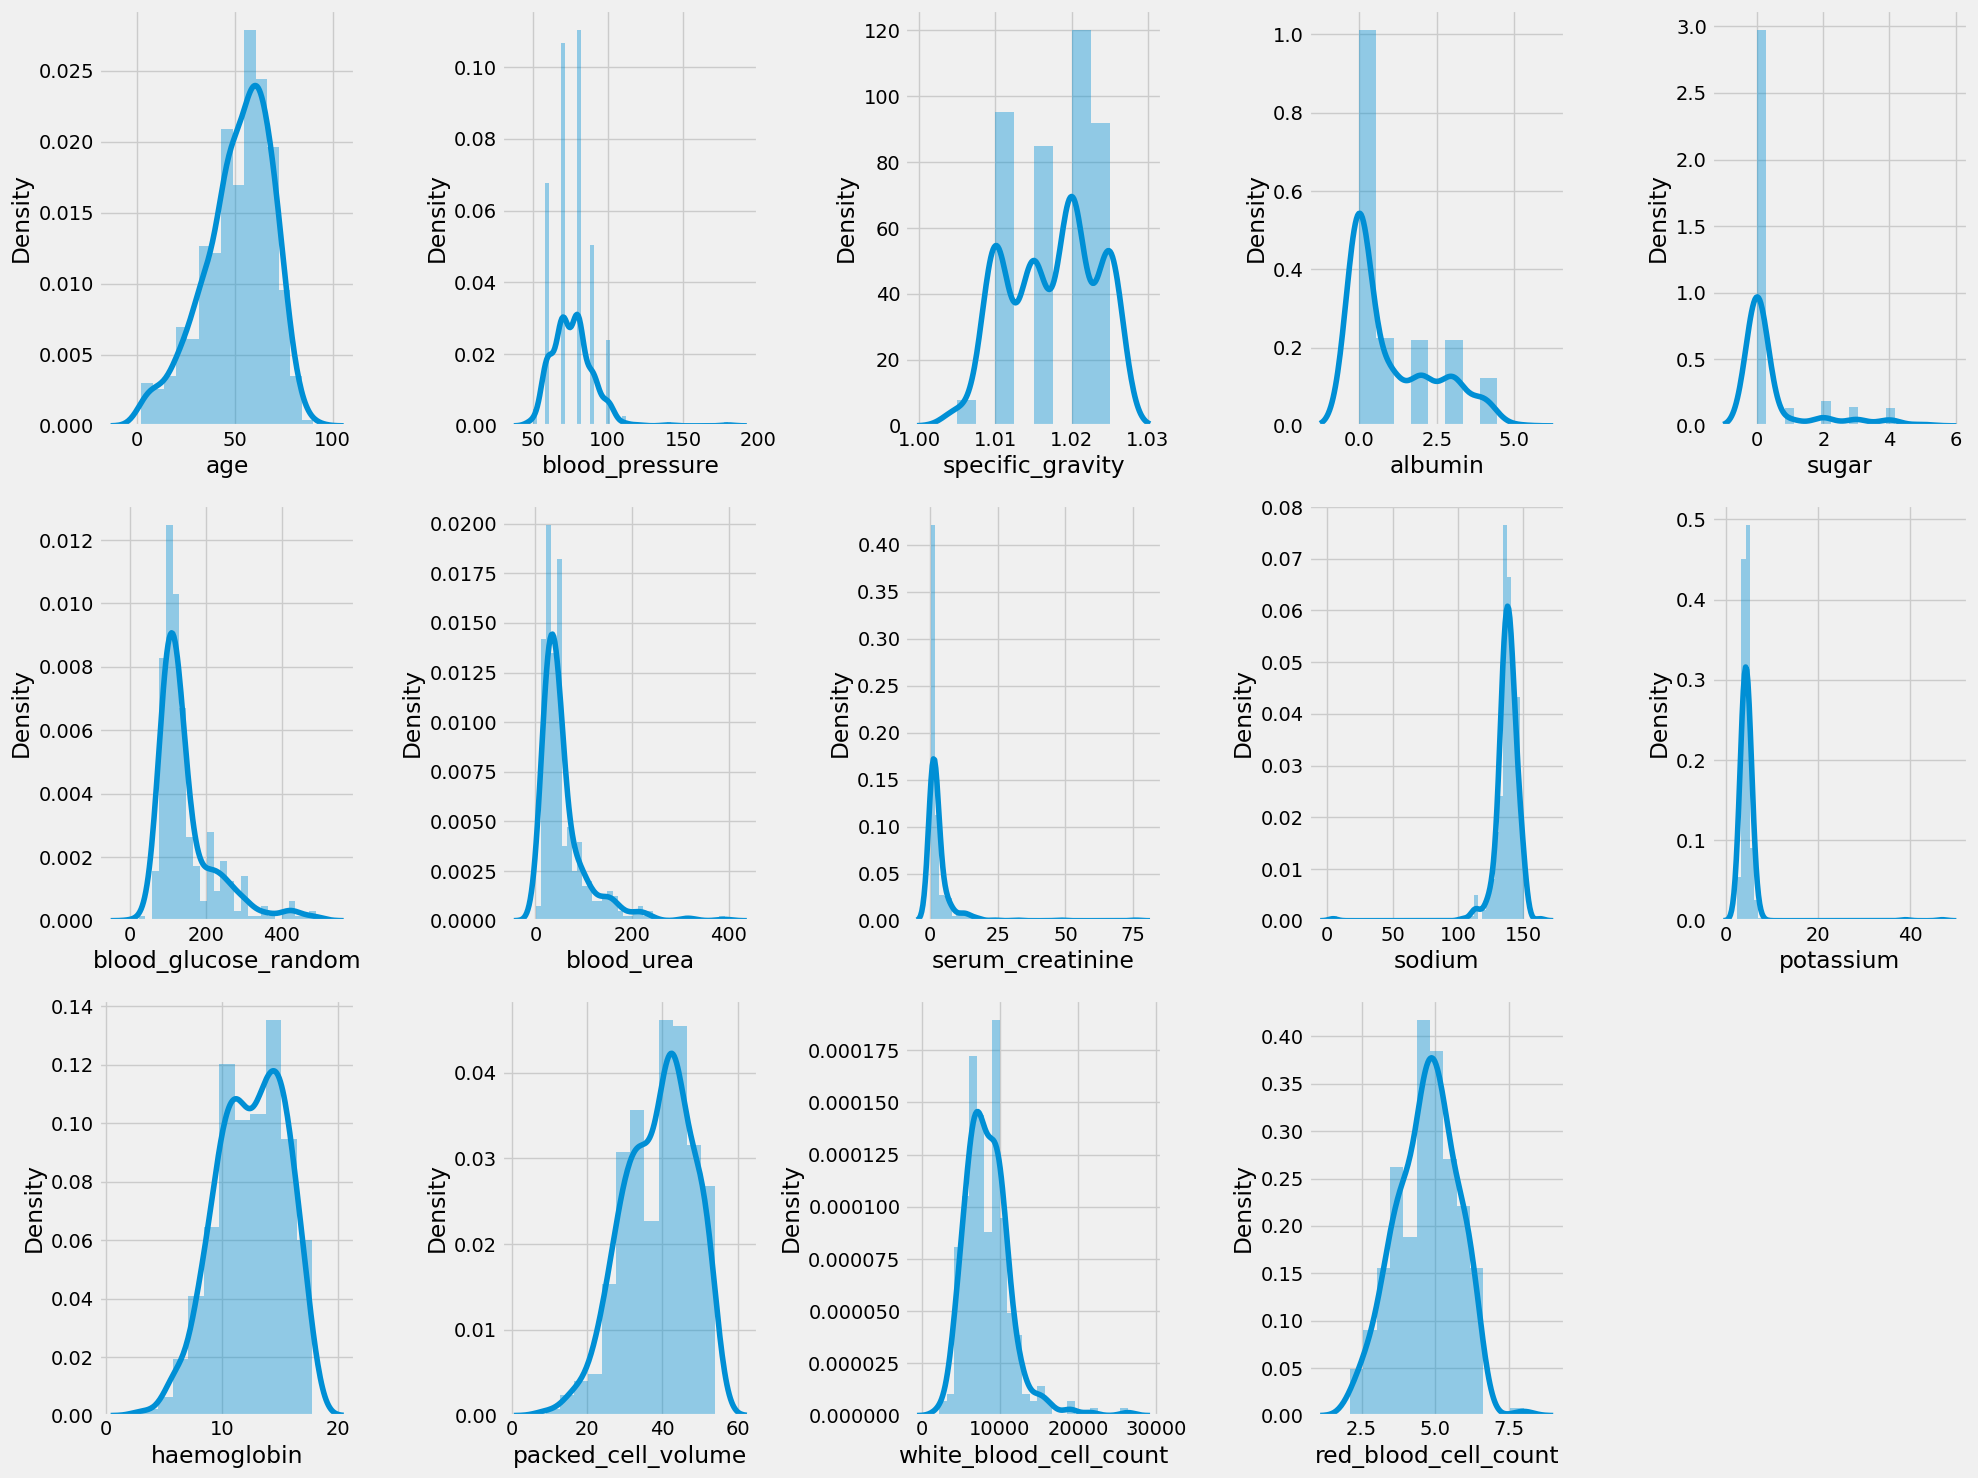

In [ ]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Skewness is present in some of the columns.</strong></p>

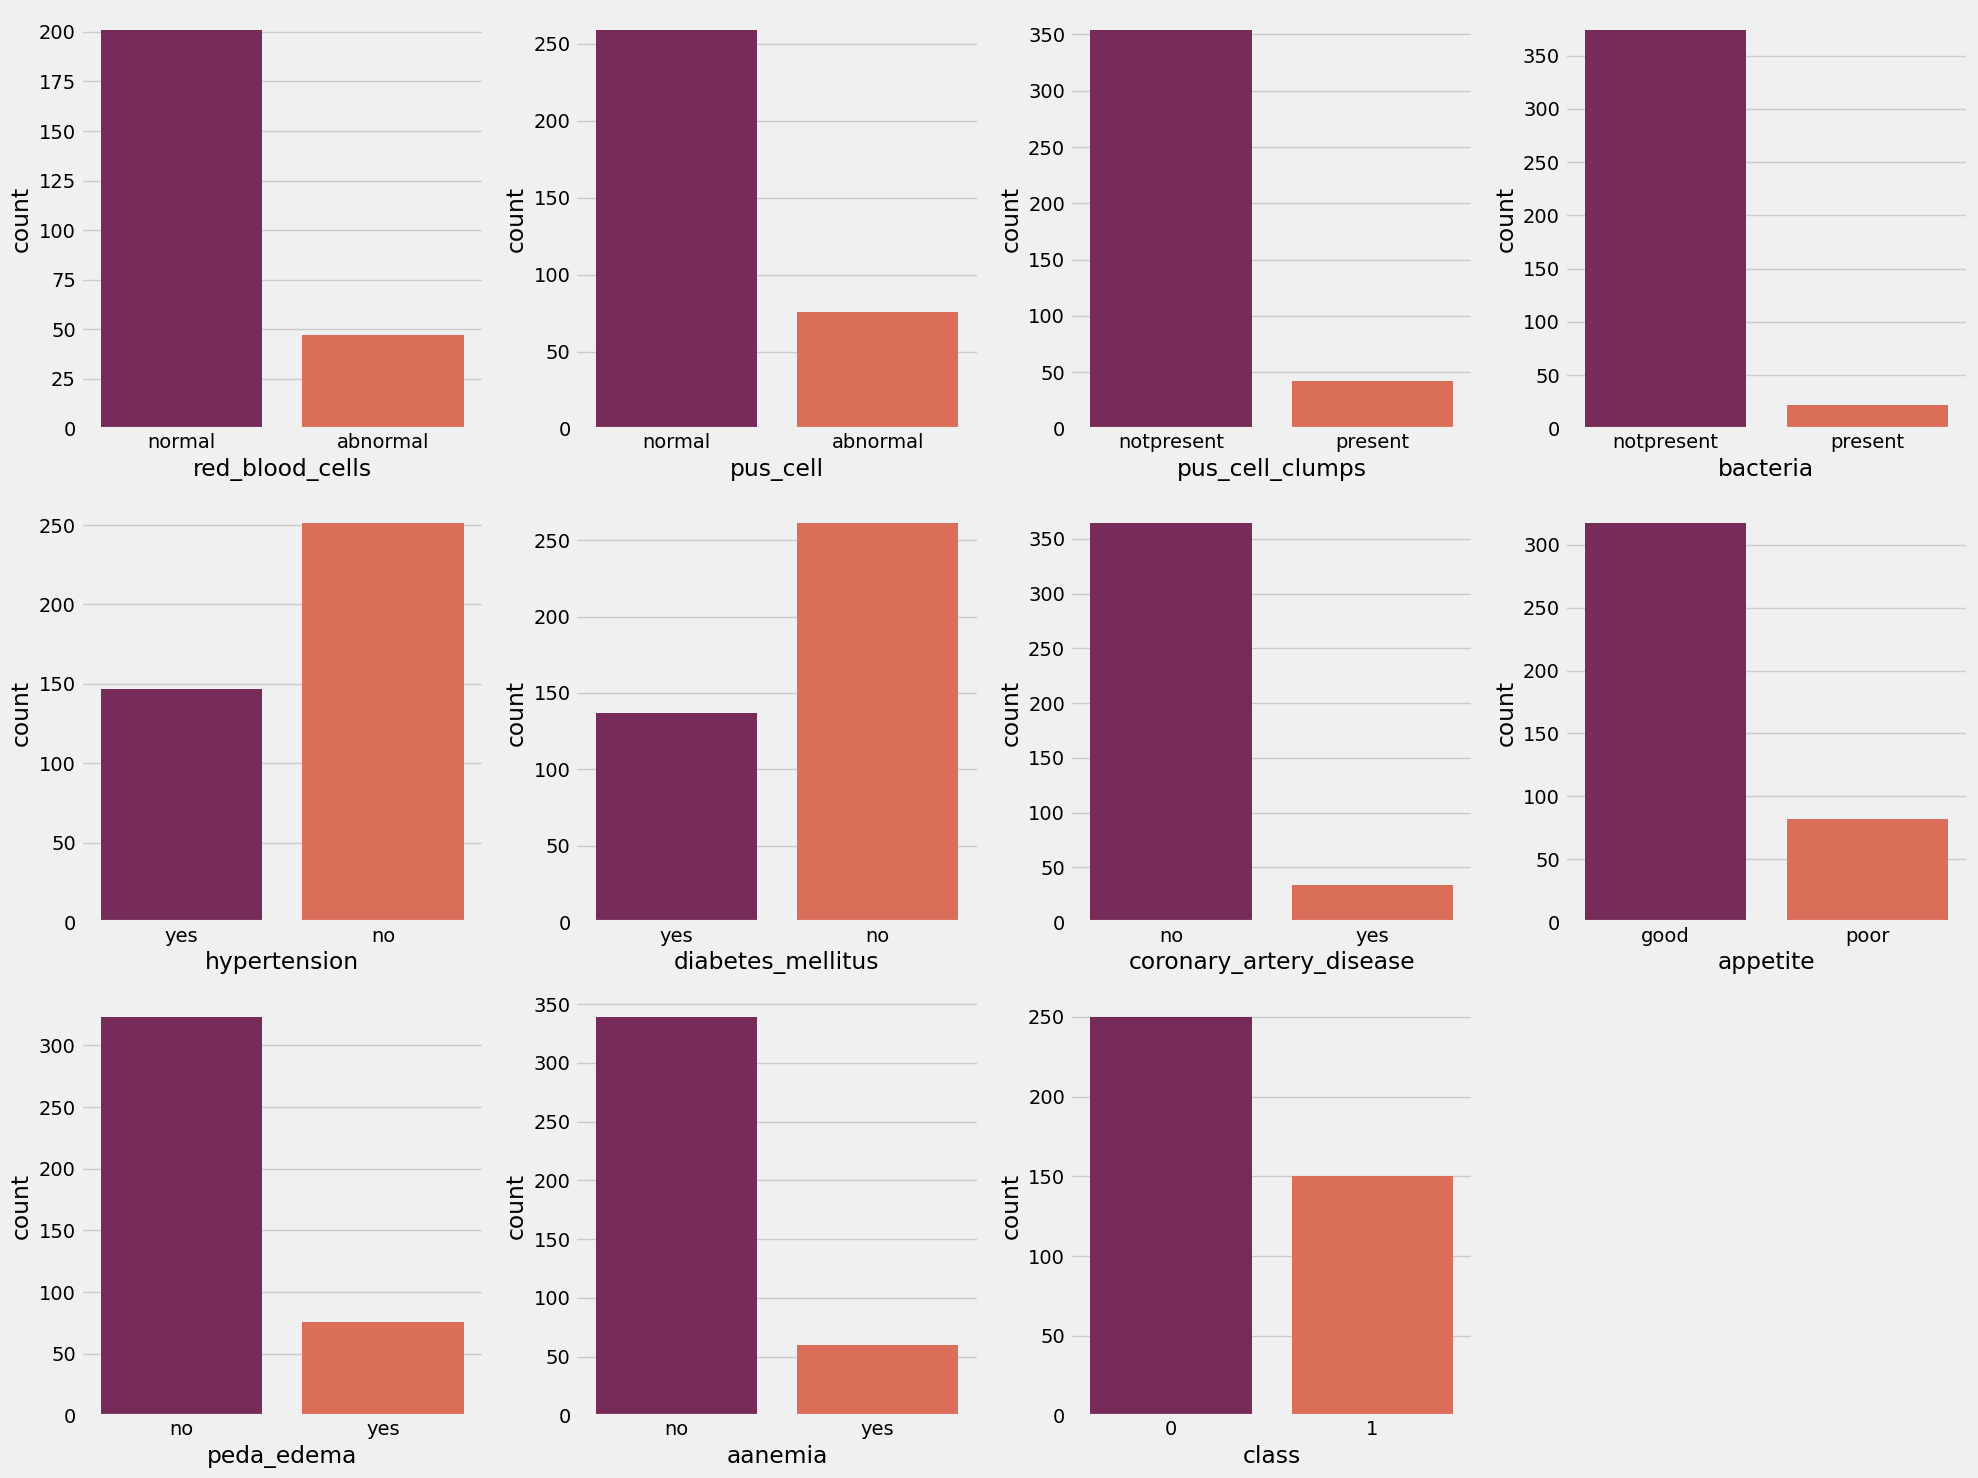

In [ ]:
# Looking at categorical columns
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= len(cat_cols):
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(data=df, x=column, palette='rocket', ax=ax)
        plt.xlabel(column)
        plotnumber += 1

plt.tight_layout()
plt.show()


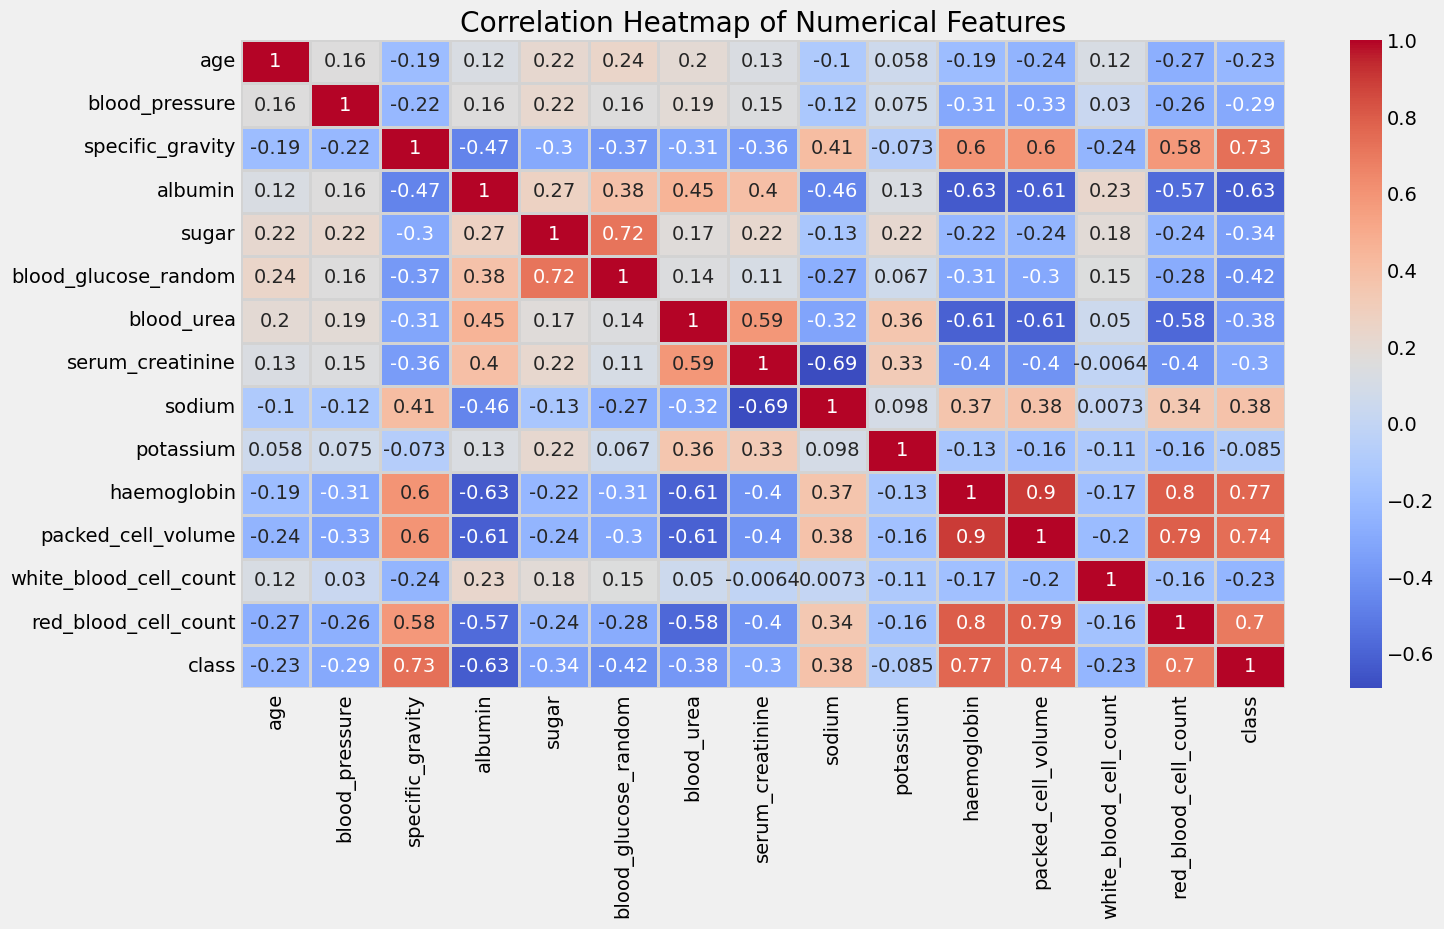

In [ ]:
# heatmap of numerical data only
plt.figure(figsize=(15, 8))

# Select only numerical columns for correlation
numerical_df = df[num_cols + ["class"]]  # Include 'class' for correlation with target

# Create correlation heatmap
sns.heatmap(
    numerical_df.corr(),
    annot=True,
    linewidths=2,
    linecolor="lightgrey",
    cmap="coolwarm",
)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [ ]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

<a id = '2.0'></a>
<p style = "font-size : 40px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Exploratory Data Analysis (EDA)</strong></p>

In [ ]:
# defining functions to create plot

def violin(col):
    fig = px.violin(df, y=col, x="class", color="class", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(df, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="class", template = 'plotly_dark')
    return fig.show()

In [ ]:
violin('red_blood_cell_count')

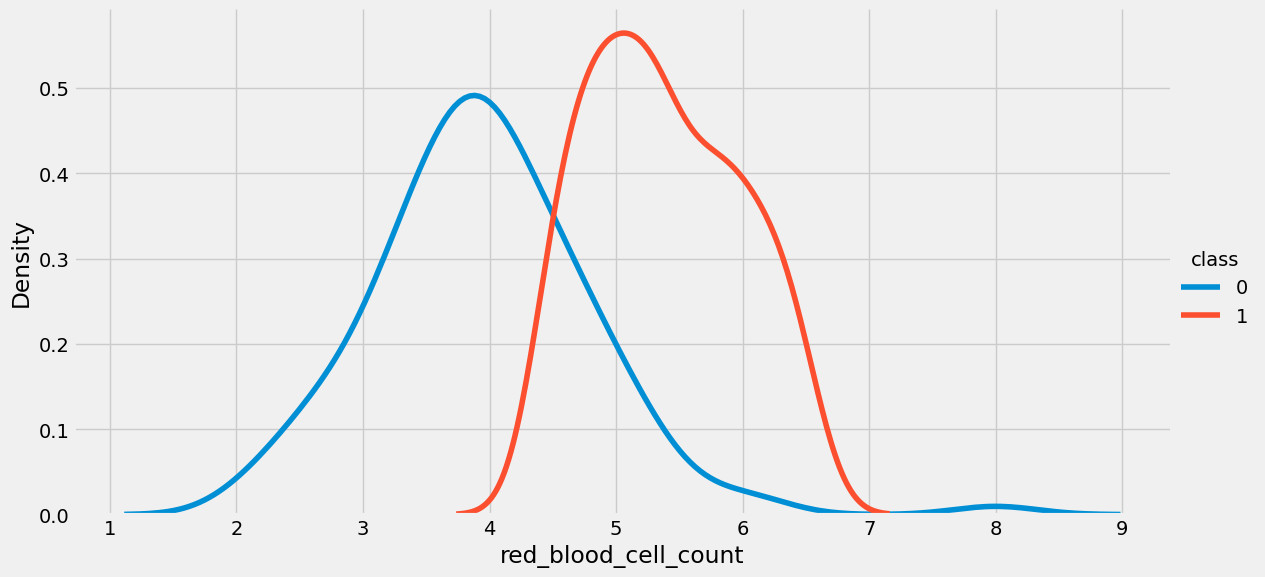

In [ ]:
kde('red_blood_cell_count')

In [ ]:
violin('white_blood_cell_count')

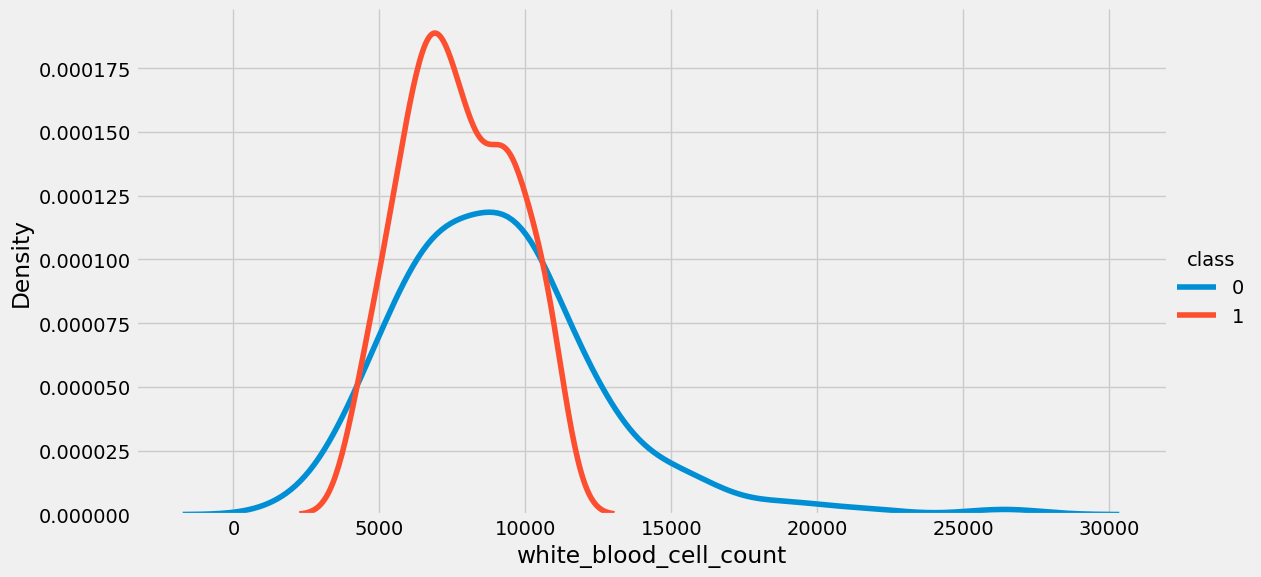

In [ ]:
kde('white_blood_cell_count')

In [ ]:
violin('packed_cell_volume')

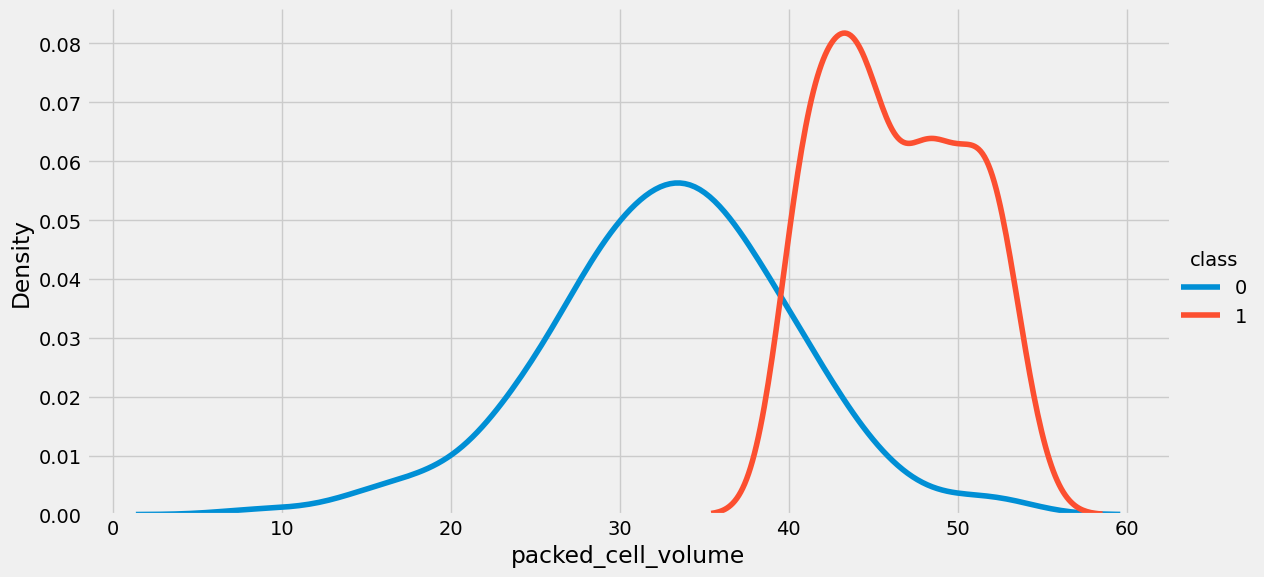

In [ ]:
kde('packed_cell_volume')

In [ ]:
violin('haemoglobin')

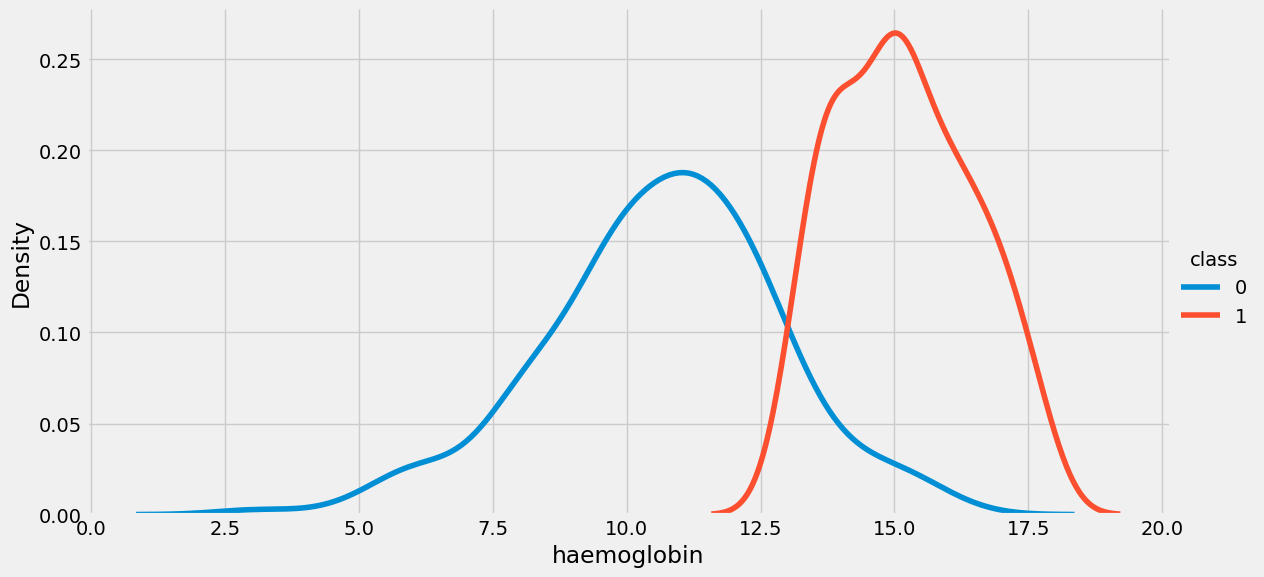

In [ ]:
kde('haemoglobin')

In [ ]:
violin('albumin')

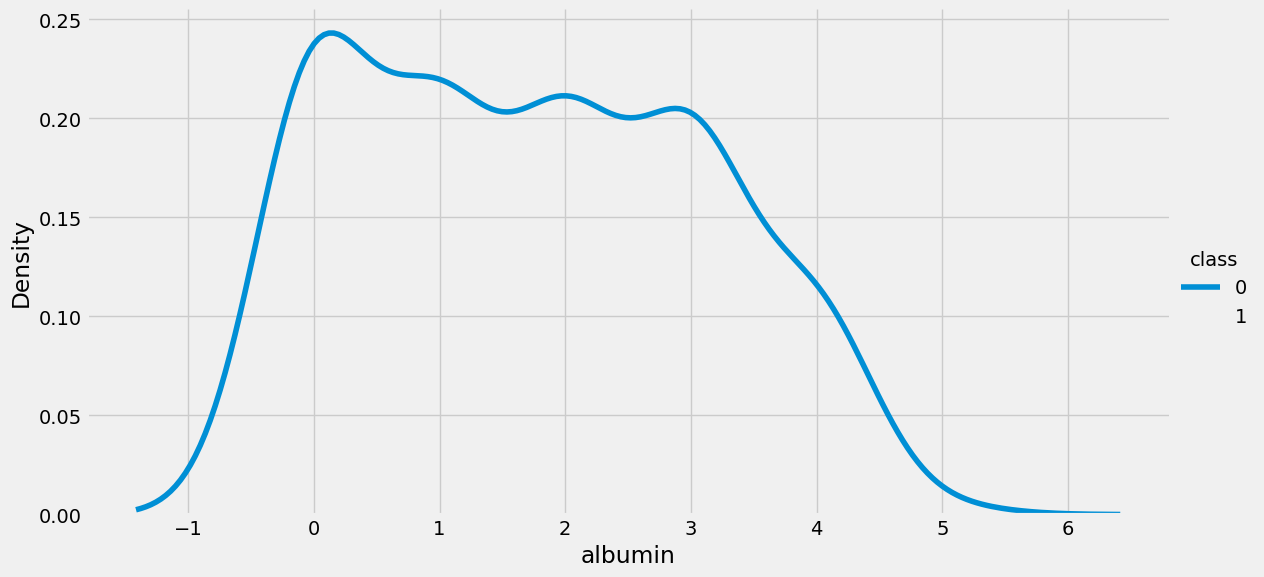

In [ ]:
kde('albumin')

In [ ]:
violin('blood_glucose_random')

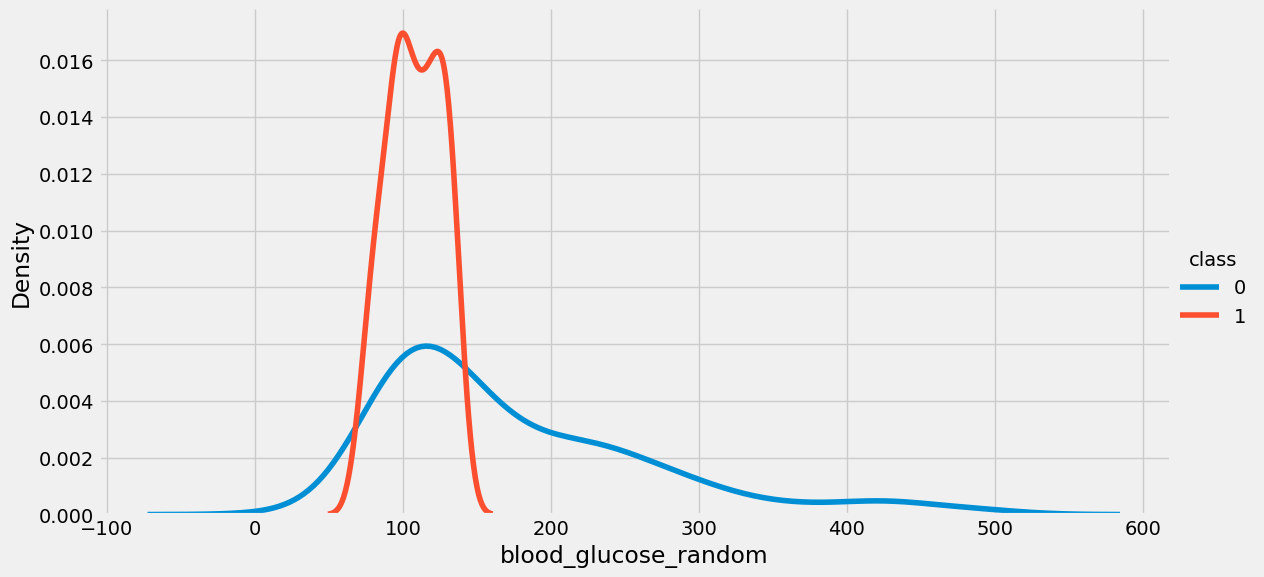

In [ ]:
kde('blood_glucose_random')

In [ ]:
violin('sodium')

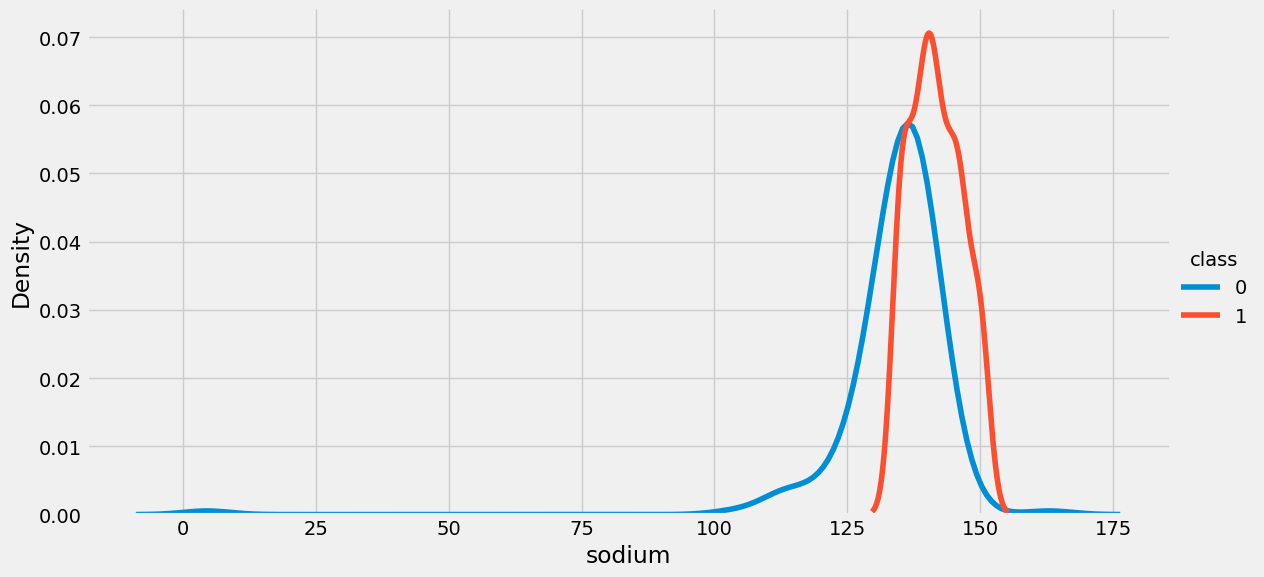

In [ ]:
kde('sodium')

In [ ]:
violin('blood_urea')

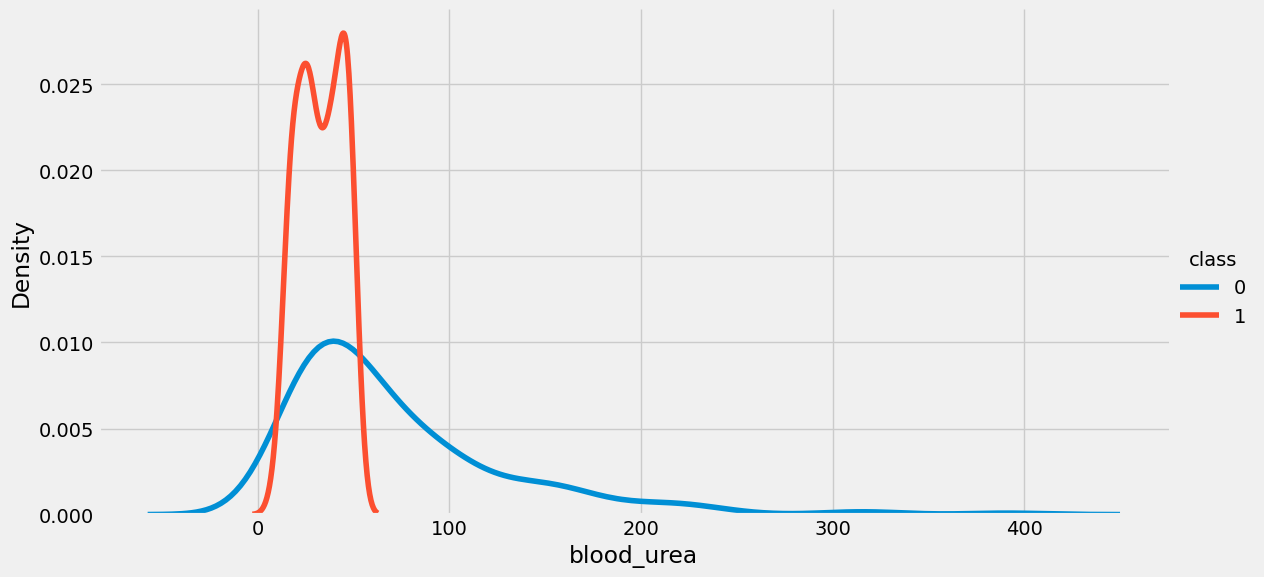

In [ ]:

kde('blood_urea')

In [ ]:
violin('specific_gravity')

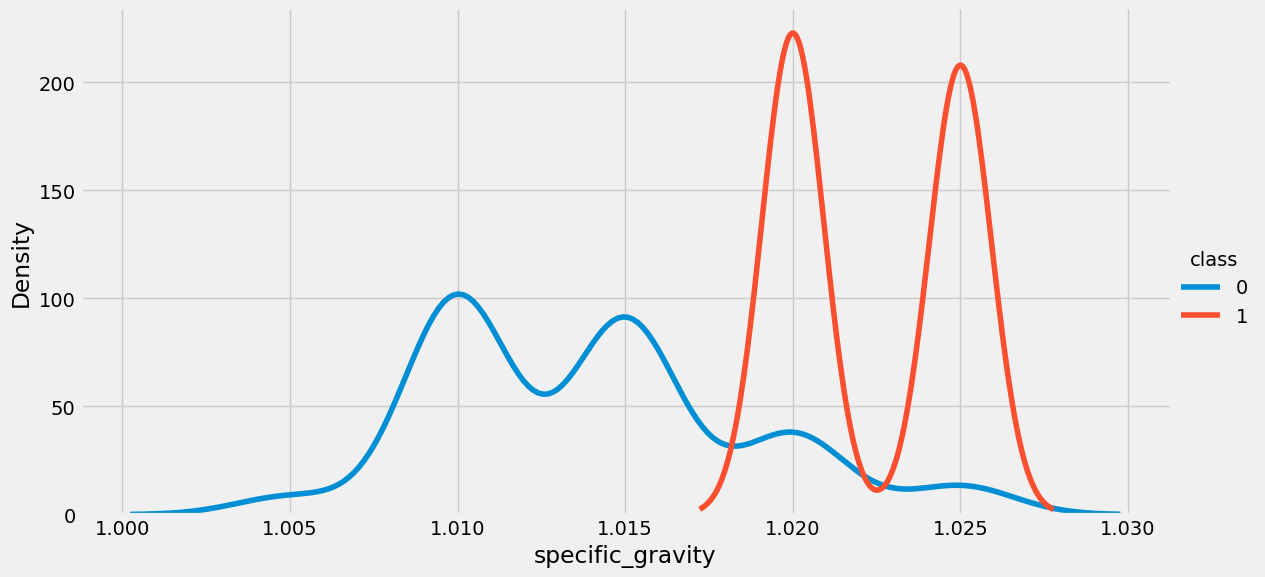

In [ ]:
kde('specific_gravity')

In [ ]:
scatter('haemoglobin', 'packed_cell_volume')

In [ ]:
scatter('red_blood_cell_count', 'packed_cell_volume')

In [ ]:

scatter('red_blood_cell_count', 'albumin')

In [ ]:

scatter('sugar', 'blood_glucose_random')

In [ ]:


scatter('packed_cell_volume','blood_urea')

In [ ]:
px.bar(df, x="specific_gravity", y="packed_cell_volume", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [ ]:

px.bar(df, x="specific_gravity", y="albumin", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [ ]:

px.bar(df, x="blood_pressure", y="packed_cell_volume", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [ ]:
px.bar(df, x="blood_pressure", y="haemoglobin", color='class', barmode='group', template = 'plotly_dark', height = 400)


#Data Pre Processing

In [ ]:
# checking for null values

df.isna().sum().sort_values(ascending = False)

,0
red_blood_cells,152
red_blood_cell_count,131
white_blood_cell_count,106
potassium,88
sodium,87
packed_cell_volume,71
pus_cell,65
haemoglobin,52
sugar,49
specific_gravity,47


In [ ]:

df[num_cols].isnull().sum()

,0
age,9
blood_pressure,12
specific_gravity,47
albumin,46
sugar,49
blood_glucose_random,44
blood_urea,19
serum_creatinine,17
sodium,87
potassium,88


In [ ]:

df[cat_cols].isnull().sum()

,0
red_blood_cells,152
pus_cell,65
pus_cell_clumps,4
bacteria,4
hypertension,2
diabetes_mellitus,2
coronary_artery_disease,2
appetite,1
peda_edema,1
aanemia,1


**Handling Missing Values**

In [ ]:
# filling null values, we will use two methods, random sampling for higher null values and
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [ ]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [ ]:
df[num_cols].isnull().sum()

,0
age,0
blood_pressure,0
specific_gravity,0
albumin,0
sugar,0
blood_glucose_random,0
blood_urea,0
serum_creatinine,0
sodium,0
potassium,0


In [ ]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [ ]:
df[cat_cols].isnull().sum()

,0
red_blood_cells,0
pus_cell,0
pus_cell_clumps,0
bacteria,0
hypertension,0
diabetes_mellitus,0
coronary_artery_disease,0
appetite,0
peda_edema,0
aanemia,0


<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>All the missing values are handeled now, lets do ctaegorical features encding now</strong></p>

<a id = '4.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Feature Encoding</strong></p>

In [ ]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>As all of the categorical columns have 2 categories we can use label encoder</strong></p>

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,139.0,4.0,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,89.0,18.0,0.8,138.0,3.5,11.3,38.0,6000.0,3.8,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,140.0,3.7,9.6,31.0,7500.0,4.8,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,120.0,3.5,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


# Feature engineering

**Scaling Numerical Features**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numerical_features = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
                      'blood_glucose_random', 'blood_urea', 'serum_creatinine',
                      'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume',
                      'white_blood_cell_count', 'red_blood_cell_count']

scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


# Models

<a id = '5.0'></a>
<p style = "font-size : 45px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Model Building</strong></p>

In [ ]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [ ]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

<a id = '5.1'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>KNN</strong></p>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.9678571428571429
Test Accuracy of KNN is 0.975 

Confusion Matrix :- 
[[70  2]
 [ 1 47]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        72
           1       0.96      0.98      0.97        48

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



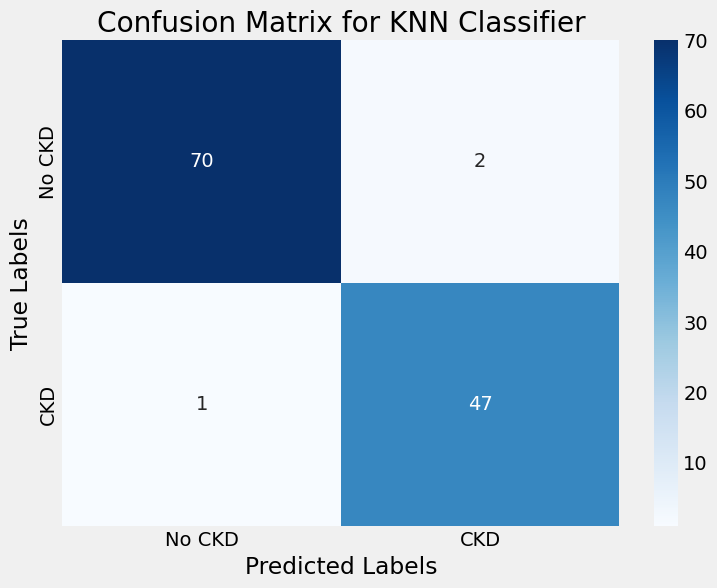

In [ ]:
knn_pred = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No CKD", "CKD"], yticklabels=["No CKD", "CKD"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for KNN Classifier")
plt.show()


<a id = '5.2'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Decision Tree Classifier</strong></p>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9583333333333334 

Confusion Matrix :- 
[[71  1]
 [ 4 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.98      0.92      0.95        48

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



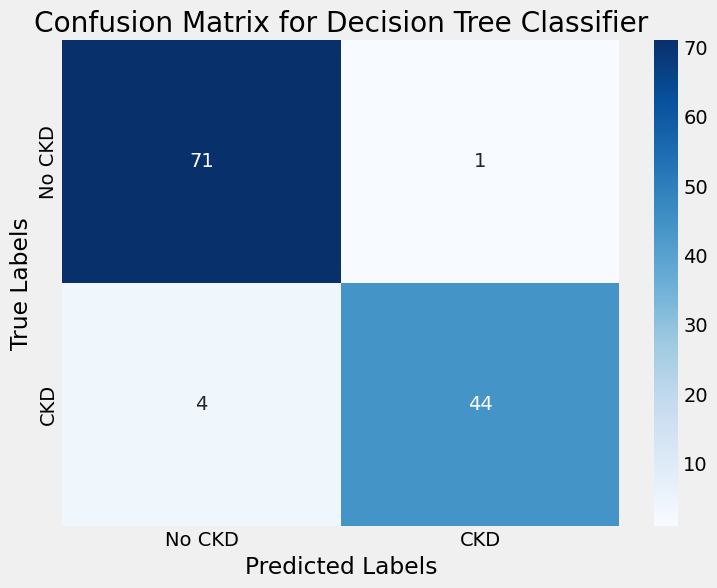

In [ ]:


dtc_pred = dtc.predict(X_test)
dtc_conf_matrix = confusion_matrix(y_test, dtc_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(dtc_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No CKD", "CKD"], yticklabels=["No CKD", "CKD"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()


In [ ]:
# hyper parameter tuning of decision tree

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [ ]:
# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'splitter': 'best'}
0.9892857142857142


In [ ]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9821428571428571
Test Accuracy of Decision Tree Classifier is 0.9916666666666667 

Confusion Matrix :- 
[[72  0]
 [ 1 47]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



Training Accuracy of Decision Tree Classifier is 0.9821428571428571
Test Accuracy of Decision Tree Classifier is 0.9916666666666667 

Confusion Matrix :- 
[[72  0]
 [ 1 47]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



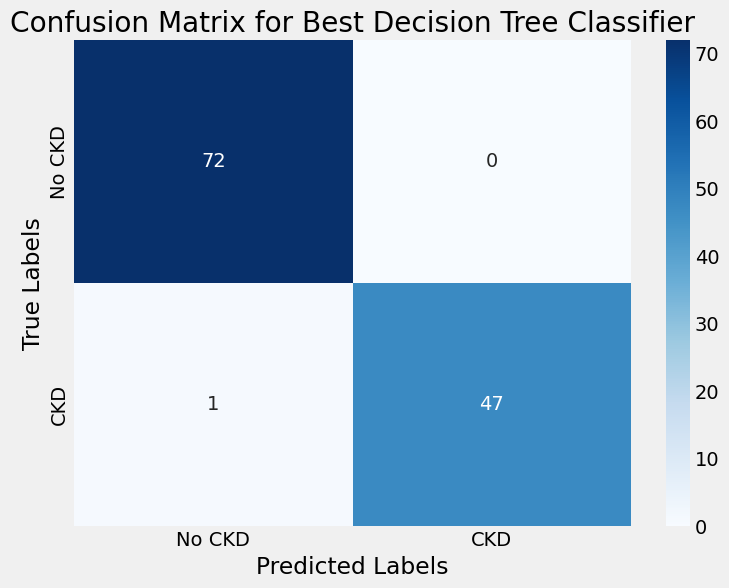

In [ ]:

# Predictions and accuracy
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
dtc_pred = dtc.predict(X_test)
dtc_conf_matrix = confusion_matrix(y_test, dtc_pred)

# Print metrics
print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")
print(f"Confusion Matrix :- \n{dtc_conf_matrix}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc_pred)}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dtc_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No CKD", "CKD"], yticklabels=["No CKD", "CKD"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Best Decision Tree Classifier")
plt.show()


<a id = '5.3'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Random Forest Classifier</strong></p>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(
    criterion="entropy",
    max_depth=11,
    max_features="sqrt",
    min_samples_leaf=2,
    min_samples_split=3,
    n_estimators=130,
)

rd_clf.fit(X_train, y_train)


# accuracy score, confusion matrix and classification report of random forest


rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(
    f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}"
)


print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")


print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(
    f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}"
)

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.9833333333333333 

Confusion Matrix :- 
[[72  0]
 [ 2 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.9833333333333333 

Confusion Matrix :- 
[[72  0]
 [ 2 46]]

Classification Report :- 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



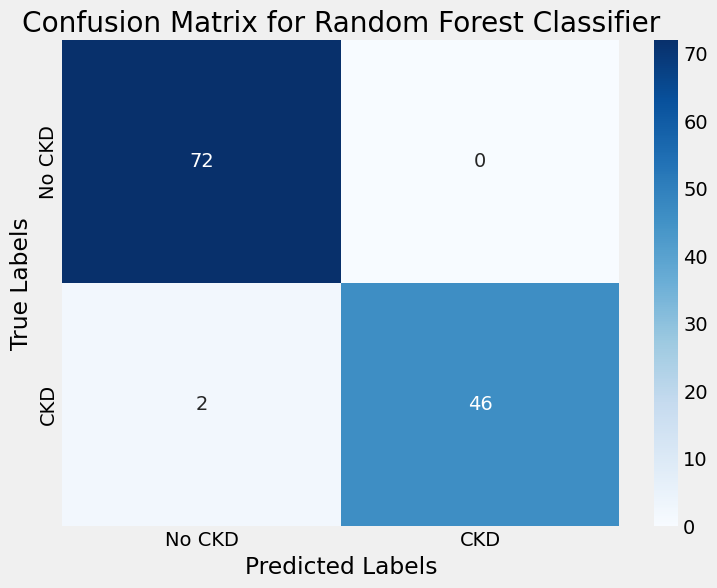

In [ ]:


# Predictions and Confusion Matrix
rd_clf_pred = rd_clf.predict(X_test)
rd_clf_conf_matrix = confusion_matrix(y_test, rd_clf_pred)

# Accuracy Scores
rd_clf_acc = accuracy_score(y_test, rd_clf_pred)
print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

# Classification Report
print(f"Confusion Matrix :- \n{rd_clf_conf_matrix}\n")
print(f"Classification Report :- \n{classification_report(y_test, rd_clf_pred)}")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rd_clf_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No CKD", "CKD"], yticklabels=["No CKD", "CKD"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()


<a id = '5.4'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Ada Boost Classifier</strong></p>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(estimator=dtc)
ada.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(
    f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train))}"
)
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(
    f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test))}"
)

Training Accuracy of Ada Boost Classifier is 1.0
Test Accuracy of Ada Boost Classifier is 0.9833333333333333 

Confusion Matrix :- 
[[71  1]
 [ 1 47]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



Training Accuracy of Ada Boost Classifier is 1.0
Test Accuracy of Ada Boost Classifier is 0.9833333333333333 

Confusion Matrix :- 
[[71  1]
 [ 1 47]]

Classification Report :- 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



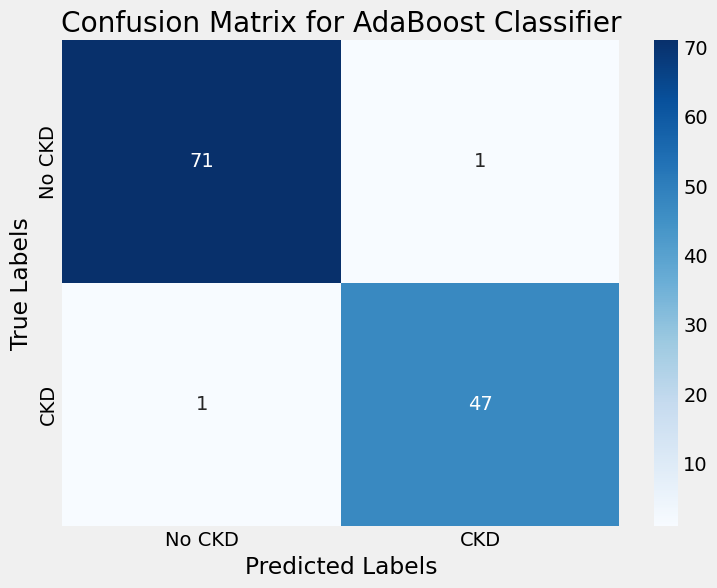

In [ ]:

# Predictions and Confusion Matrix
ada_pred = ada.predict(X_test)
ada_conf_matrix = confusion_matrix(y_test, ada_pred)

# Accuracy Scores
ada_acc = accuracy_score(y_test, ada_pred)
print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")

# Classification Report
print(f"Confusion Matrix :- \n{ada_conf_matrix}\n")
print(f"Classification Report :- \n{classification_report(y_test, ada_pred)}")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(ada_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No CKD", "CKD"], yticklabels=["No CKD", "CKD"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for AdaBoost Classifier")
plt.show()


<a id = '5.5'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Gradient Boosting Classifier</strong></p>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.9833333333333333 

Confusion Matrix :- 
[[72  0]
 [ 2 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.9833333333333333 

Confusion Matrix :- 
[[72  0]
 [ 2 46]]

Classification Report :- 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



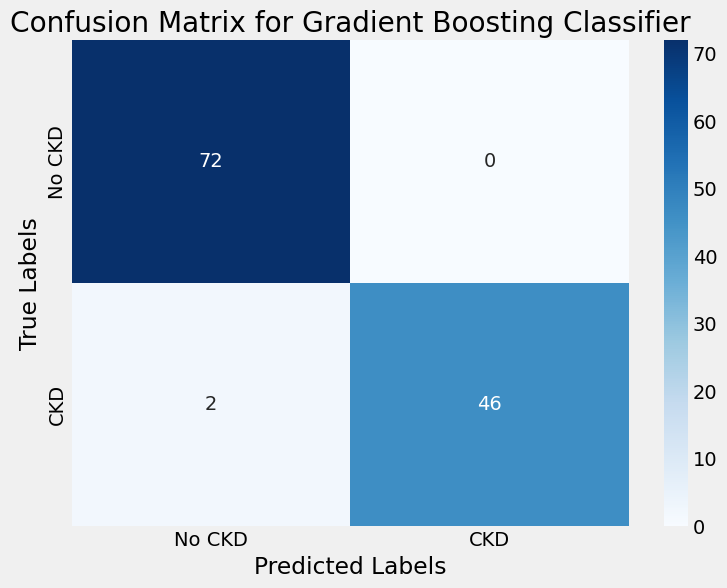

In [ ]:


# Predictions and Confusion Matrix
gb_pred = gb.predict(X_test)
gb_conf_matrix = confusion_matrix(y_test, gb_pred)

# Accuracy Scores
gb_acc = accuracy_score(y_test, gb_pred)
print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

# Classification Report
print(f"Confusion Matrix :- \n{gb_conf_matrix}\n")
print(f"Classification Report :- \n{classification_report(y_test, gb_pred)}")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(gb_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No CKD", "CKD"], yticklabels=["No CKD", "CKD"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Gradient Boosting Classifier")
plt.show()


<a id = '5.6'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Stochastic Gradient Boosting (SGB)</strong></p>

In [ ]:
sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, sgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting is 1.0
Test Accuracy of Stochastic Gradient Boosting is 0.975 

Confusion Matrix :- 
[[72  0]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



Training Accuracy of Stochastic Gradient Boosting is 1.0
Test Accuracy of Stochastic Gradient Boosting is 0.975 

Confusion Matrix :- 
[[72  0]
 [ 3 45]]

Classification Report :- 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



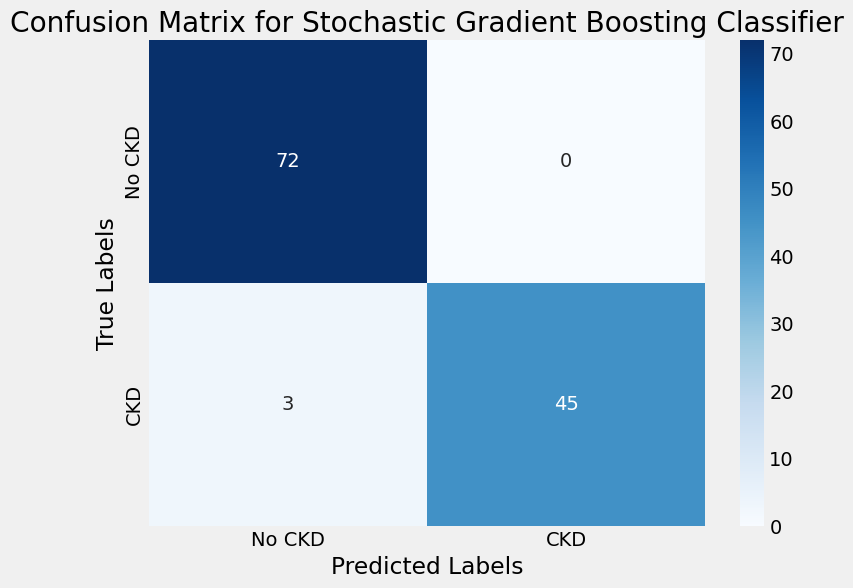

In [ ]:


# Predictions and Confusion Matrix
sgb_pred = sgb.predict(X_test)
sgb_conf_matrix = confusion_matrix(y_test, sgb_pred)

# Accuracy Scores
sgb_acc = accuracy_score(y_test, sgb_pred)
print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")

# Classification Report
print(f"Confusion Matrix :- \n{sgb_conf_matrix}\n")
print(f"Classification Report :- \n{classification_report(y_test, sgb_pred)}")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(sgb_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No CKD", "CKD"], yticklabels=["No CKD", "CKD"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Stochastic Gradient Boosting Classifier")
plt.show()


<a id = '5.7'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>XgBoost</strong></p>

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.9666666666666667 

Confusion Matrix :- 
[[71  1]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.98      0.94      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.97       120
weighted avg       0.97      0.97      0.97       120



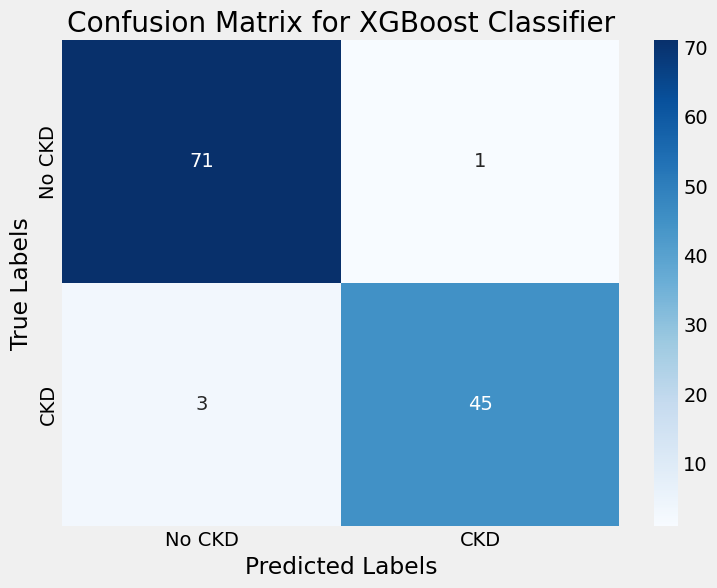

In [ ]:


y_pred = xgb.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No CKD", "CKD"], yticklabels=["No CKD", "CKD"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for XGBoost Classifier")
plt.show()


In [ ]:
%pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00


<a id = '5.8'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Cat Boost Classifier</strong></p>

In [ ]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train)

Learning rate set to 0.408198
0:	learn: 0.2901883	total: 48.8ms	remaining: 439ms
1:	learn: 0.1580808	total: 50.7ms	remaining: 203ms
2:	learn: 0.0843858	total: 52.6ms	remaining: 123ms
3:	learn: 0.0600663	total: 54.6ms	remaining: 81.8ms
4:	learn: 0.0452882	total: 56.4ms	remaining: 56.4ms
5:	learn: 0.0340111	total: 58.3ms	remaining: 38.9ms
6:	learn: 0.0271373	total: 60.2ms	remaining: 25.8ms
7:	learn: 0.0231669	total: 62ms	remaining: 15.5ms
8:	learn: 0.0199950	total: 63.8ms	remaining: 7.09ms
9:	learn: 0.0169899	total: 65.6ms	remaining: 0us


In [ ]:
# accuracy score, confusion matrix and classification report of cat boost

cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, cat.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")

Training Accuracy of Cat Boost Classifier is 1.0
Test Accuracy of Cat Boost Classifier is 0.9916666666666667 

Confusion Matrix :- 
[[72  0]
 [ 1 47]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



Training Accuracy of Cat Boost Classifier is 1.0
Test Accuracy of Cat Boost Classifier is 0.9916666666666667 

Confusion Matrix :- 
[[72  0]
 [ 1 47]]

Classification Report :- 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



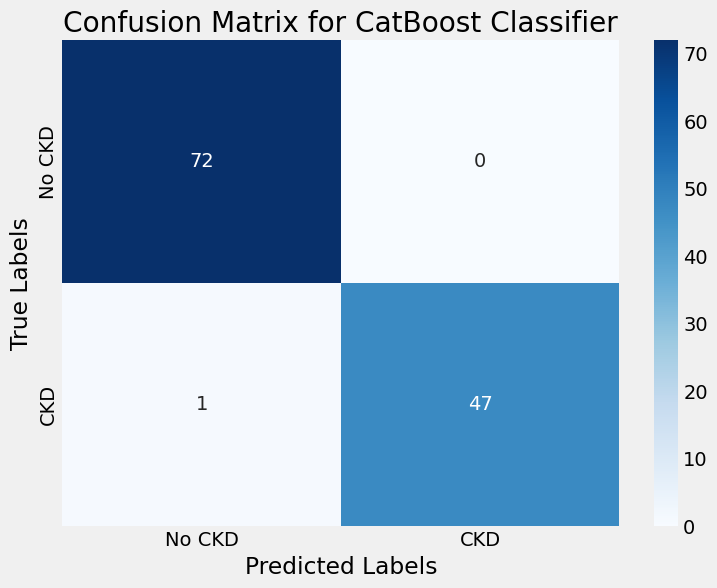

In [ ]:


# Predictions and Confusion Matrix
cat_pred = cat.predict(X_test)
cat_conf_matrix = confusion_matrix(y_test, cat_pred)

# Accuracy Scores
cat_acc = accuracy_score(y_test, cat_pred)
print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")

# Classification Report
print(f"Confusion Matrix :- \n{cat_conf_matrix}\n")
print(f"Classification Report :- \n{classification_report(y_test, cat_pred)}")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cat_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No CKD", "CKD"], yticklabels=["No CKD", "CKD"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for CatBoost Classifier")
plt.show()


<a id = '5.9'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Extra Trees Classifier</strong></p>

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, etc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.9833333333333333 

Confusion Matrix :- 
[[71  1]
 [ 1 47]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.9833333333333333 

Confusion Matrix :- 
[[71  1]
 [ 1 47]]

Classification Report :- 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



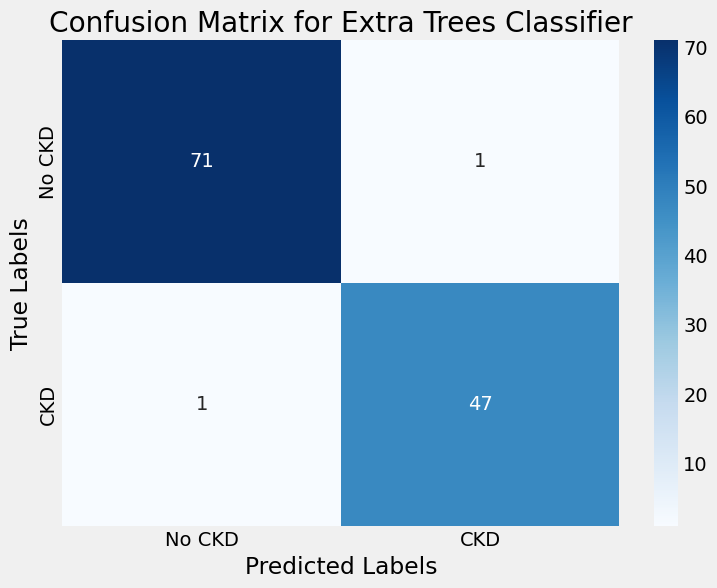

In [ ]:


# Predictions and Confusion Matrix
etc_pred = etc.predict(X_test)
etc_conf_matrix = confusion_matrix(y_test, etc_pred)

# Accuracy Scores
etc_acc = accuracy_score(y_test, etc_pred)
print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")

# Classification Report
print(f"Confusion Matrix :- \n{etc_conf_matrix}\n")
print(f"Classification Report :- \n{classification_report(y_test, etc_pred)}")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(etc_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No CKD", "CKD"], yticklabels=["No CKD", "CKD"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Extra Trees Classifier")
plt.show()


<a id = '5.10'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>LGBM Classifier</strong></p>

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

print(f"{confusion_matrix(y_test, lgbm.predict(X_test))}\n")
print(classification_report(y_test, lgbm.predict(X_test)))

[LightGBM] [Info] Number of positive: 102, number of negative: 178
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364286 -> initscore=-0.556811
[LightGBM] [Info] Start training from score -0.556811
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Training Accuracy of LGBM Classifier is 1.0
Test Accuracy of LGBM Classifier is 0.975 

Confusion Matrix :- 
[[71  1]
 [ 2 46]]

Classification Report :- 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.96      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



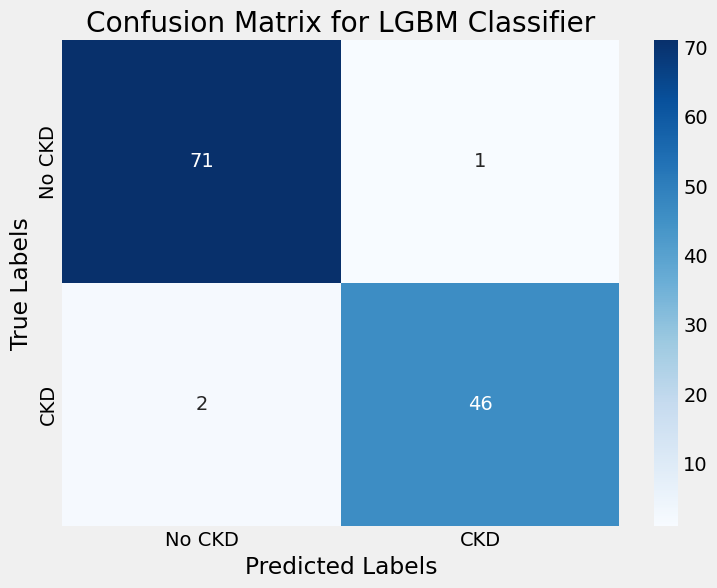

In [ ]:


# Predictions and Confusion Matrix
lgbm_pred = lgbm.predict(X_test)
lgbm_conf_matrix = confusion_matrix(y_test, lgbm_pred)

# Accuracy Scores
lgbm_acc = accuracy_score(y_test, lgbm_pred)
print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

# Classification Report
print(f"Confusion Matrix :- \n{lgbm_conf_matrix}\n")
print(f"Classification Report :- \n{classification_report(y_test, lgbm_pred)}")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lgbm_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No CKD", "CKD"], yticklabels=["No CKD", "CKD"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for LGBM Classifier")
plt.show()


<a id = '6.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Models Comparison</strong></p>

In [ ]:

models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier'],
    'Score' : [knn_acc, dtc_acc, rd_clf_acc, ada_acc, gb_acc, sgb_acc, xgb_acc, cat_acc, etc_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Decision Tree Classifier,0.991667
7,Cat Boost,0.991667
2,Random Forest Classifier,0.983333
3,Ada Boost Classifier,0.983333
4,Gradient Boosting Classifier,0.983333
8,Extra Trees Classifier,0.983333
0,KNN,0.975000
5,Stochastic Gradient Boosting,0.975000
6,XgBoost,0.966667


In [ ]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark',
       title = 'Models Comparison')

**Association Rule Mining: FP-Growth Algorithm**

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [ ]:
print(df.columns)

df_binary = df.loc[:, ['hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
                       'haemoglobin', 'blood_pressure', 'blood_glucose_random']]

df_binary

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,hypertension,diabetes_mellitus,coronary_artery_disease,haemoglobin,blood_pressure,blood_glucose_random
0,1,1,0,0.836735,0.230769,0.211538
1,0,0,0,0.557823,0.000000,0.143162
2,0,1,0,0.442177,0.230769,0.856838
3,1,0,0,0.551020,0.153846,0.202991
4,0,0,0,0.578231,0.230769,0.179487
...,...,...,...,...,...,...
395,0,0,0,0.857143,0.230769,0.252137
396,0,0,0,0.911565,0.153846,0.113248
397,0,0,0,0.863946,0.230769,0.166667
398,0,0,0,0.755102,0.076923,0.196581


In [ ]:
df_binary_bool = df_binary.astype(bool)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
frequent_itemsets = fpgrowth(df_binary_bool, min_support=0.2, use_colnames=True, verbose = 1)

5 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (blood_glucose_random)
1 itemset(s) from tree conditioned on items (haemoglobin)
2 itemset(s) from tree conditioned on items (blood_pressure)
0 itemset(s) from tree conditioned on items (blood_pressure, haemoglobin)
1 itemset(s) from tree conditioned on items (blood_pressure, blood_glucose_random)
3 itemset(s) from tree conditioned on items (hypertension)
0 itemset(s) from tree conditioned on items (hypertension, blood_glucose_random)
1 itemset(s) from tree conditioned on items (hypertension, blood_pressure)
3 itemset(s) from tree conditioned on items (hypertension, haemoglobin)
4 itemset(s) from tree conditioned on items (diabetes_mellitus)
0 itemset(s) from tree conditioned on items (diabetes_mellitus, blood_glucose_random)
1 itemset(s) from tree conditioned on items (diabetes_mellitus, blood_pressure)
3 itemset(s) from tree conditioned on items (diabetes_mellitus, haemoglobin)
7 itemset(s) fro

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
print(frequent_itemsets)

    support                                           itemsets
0    0.9975                             (blood_glucose_random)
1    0.9975                                      (haemoglobin)
2    0.9875                                   (blood_pressure)
3    0.3675                                     (hypertension)
4    0.3425                                (diabetes_mellitus)
5    0.9950                (blood_glucose_random, haemoglobin)
6    0.9850                      (blood_pressure, haemoglobin)
7    0.9850             (blood_glucose_random, blood_pressure)
8    0.9825  (blood_glucose_random, blood_pressure, haemogl...
9    0.3675               (hypertension, blood_glucose_random)
10   0.3650                     (hypertension, blood_pressure)
11   0.3650                        (hypertension, haemoglobin)
12   0.3650  (hypertension, blood_pressure, blood_glucose_r...
13   0.3650  (hypertension, blood_glucose_random, haemoglobin)
14   0.3625        (hypertension, blood_pressure, haemo

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
print(frequent_itemsets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



    support                                           itemsets
0    0.9975                             (blood_glucose_random)
1    0.9975                                      (haemoglobin)
2    0.9875                                   (blood_pressure)
3    0.3675                                     (hypertension)
4    0.3425                                (diabetes_mellitus)
5    0.9950                (blood_glucose_random, haemoglobin)
6    0.9850                      (blood_pressure, haemoglobin)
7    0.9850             (blood_glucose_random, blood_pressure)
8    0.9825  (blood_glucose_random, blood_pressure, haemogl...
9    0.3675               (hypertension, blood_glucose_random)
10   0.3650                     (hypertension, blood_pressure)
11   0.3650                        (hypertension, haemoglobin)
12   0.3650  (hypertension, blood_pressure, blood_glucose_r...
13   0.3650  (hypertension, blood_glucose_random, haemoglobin)
14   0.3625        (hypertension, blood_pressure, haemo

In [ ]:
pip install -U mlxtend


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
from mlxtend.frequent_patterns import association_rules
num_itemsets = len(df_binary)  # Calculate the number of transactions
rules = association_rules(frequent_itemsets, num_itemsets=num_itemsets, metric="confidence", min_threshold=0.5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
def map_itemsets_with_presence(itemset):
    item_labels = []
    for item in itemset:
        if 'Dyslipidemia' in item:
            item_labels.append('Dyslipidemia: Present')
        elif 'Hypertension' in item:
            item_labels.append('Hypertension: Present')
        elif 'Gender' in item:
            item_labels.append('Gender: Present')
        elif 'Chronic Kidney Disease' in item:
            item_labels.append('Chronic Kidney Disease: Present')
        elif 'Maculopathy' in item:
            item_labels.append('Maculopathy: Present')
        elif 'RETINOPATHY' in item:
            item_labels.append('RETINOPATHY: Present')
        elif 'Diabetic Macular Edema' in item:
            item_labels.append('Diabetic Macular Edema: Present')
        else:
            item_labels.append('Absent')
    return item_labels

# Apply the mapping function to the antecedents and consequents columns
rules['Antecedents'] = rules['antecedents'].apply(map_itemsets_with_presence)
rules['Consequents'] = rules['consequents'].apply(map_itemsets_with_presence)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
print("\nAssociation Rules:")
print(rules)


Association Rules:
                              antecedents  \
0                  (blood_glucose_random)   
1                           (haemoglobin)   
2                        (blood_pressure)   
3                           (haemoglobin)   
4                  (blood_glucose_random)   
..                                    ...   
118           (hypertension, haemoglobin)   
119  (hypertension, blood_glucose_random)   
120        (hypertension, blood_pressure)   
121                   (diabetes_mellitus)   
122                        (hypertension)   

                                           consequents  antecedent support  \
0                                        (haemoglobin)              0.9975   
1                               (blood_glucose_random)              0.9975   
2                                        (haemoglobin)              0.9875   
3                                     (blood_pressure)              0.9975   
4                                     (blood_pres

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
rows = []

# Iterate through the rules DataFrame to extract information
for index, row in rules.iterrows():
    antecedents = ', '.join(row['antecedents'])
    consequents = ', '.join(row['consequents'])
    support = row['support']
    confidence = row['confidence']
    lift = row['lift']
    # Append a new row to the list of rows
    rows.append({'Antecedents': antecedents, 'Consequents': consequents,
                 'Support': support, 'Confidence': confidence, 'Lift': lift})

# Convert the list of rows into a DataFrame
table = pd.DataFrame(rows, columns=['Antecedents', 'Consequents', 'Support', 'Confidence', 'Lift'])

# Display the generated table
(table.tail(10))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Antecedents,Consequents,Support,Confidence,Lift
113,"hypertension, blood_glucose_random, blood_pres...","haemoglobin, diabetes_mellitus",0.2625,0.719178,2.115230
114,"hypertension, diabetes_mellitus","blood_glucose_random, blood_pressure, haemoglobin",0.2625,0.990566,1.008210
115,"haemoglobin, diabetes_mellitus","hypertension, blood_glucose_random, blood_pres...",0.2625,0.772059,2.115230
116,"blood_glucose_random, diabetes_mellitus","hypertension, blood_pressure, haemoglobin",0.2625,0.766423,2.114271
117,"blood_pressure, diabetes_mellitus","hypertension, blood_glucose_random, haemoglobin",0.2625,0.772059,2.115230
118,"hypertension, haemoglobin","blood_glucose_random, blood_pressure, diabetes...",0.2625,0.719178,2.115230
119,"hypertension, blood_glucose_random","blood_pressure, haemoglobin, diabetes_mellitus",0.2625,0.714286,2.116402
120,"hypertension, blood_pressure","blood_glucose_random, haemoglobin, diabetes_me...",0.2625,0.719178,2.115230
121,diabetes_mellitus,"hypertension, blood_glucose_random, blood_pres...",0.2625,0.766423,2.114271
122,hypertension,"blood_glucose_random, blood_pressure, haemoglo...",0.2625,0.714286,2.116402


**part 2**

In [ ]:

# Convert the list of rows into a DataFrame
df_table = pd.DataFrame(rows, columns=['Antecedents', 'Consequents', 'Support', 'Confidence', 'Lift'])

# Display the generated table
print(df_table.tail(10))

# Add a column for grouping in the treemap
df_table["all"] = "Tree Map"

# Creating tree map using plotly
fig = px.treemap(df_table.head(50), path=['all', 'Antecedents'], values='Support',
                 color='Support', hover_data=['Antecedents', 'Consequents'],
                 color_continuous_scale='Blues')

# Plotting the treemap
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



                                           Antecedents  \
113  hypertension, blood_glucose_random, blood_pres...   
114                    hypertension, diabetes_mellitus   
115                     haemoglobin, diabetes_mellitus   
116            blood_glucose_random, diabetes_mellitus   
117                  blood_pressure, diabetes_mellitus   
118                          hypertension, haemoglobin   
119                 hypertension, blood_glucose_random   
120                       hypertension, blood_pressure   
121                                  diabetes_mellitus   
122                                       hypertension   

                                           Consequents  Support  Confidence  \
113                     haemoglobin, diabetes_mellitus   0.2625    0.719178   
114  blood_glucose_random, blood_pressure, haemoglobin   0.2625    0.990566   
115  hypertension, blood_glucose_random, blood_pres...   0.2625    0.772059   
116          hypertension, blood_pressure, ha

In [ ]:
import joblib

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier

# Train all models
rf_model = RandomForestClassifier().fit(X_train, y_train)
gb_model = GradientBoostingClassifier().fit(X_train, y_train)
dt_model = DecisionTreeClassifier().fit(X_train, y_train)
knn_model = KNeighborsClassifier().fit(X_train, y_train)
xgb_model = XGBClassifier().fit(X_train, y_train)
lgbm_model = LGBMClassifier().fit(X_train, y_train)
ada_model = AdaBoostClassifier().fit(X_train, y_train)
et_model = ExtraTreesClassifier().fit(X_train, y_train)

# Save all models
joblib.dump(rf_model, "random_forest_model.pkl")
joblib.dump(gb_model, "gradient_boosting_model.pkl")
joblib.dump(dt_model, "decision_tree_model.pkl")
joblib.dump(knn_model, "knn_model.pkl")
joblib.dump(xgb_model, "xgboost_model.pkl")
joblib.dump(lgbm_model, "lightgbm_model.pkl")
joblib.dump(ada_model, "adaboost_model.pkl")
joblib.dump(et_model, "extra_trees_model.pkl")

print("All models have been saved successfully!")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[LightGBM] [Info] Number of positive: 102, number of negative: 178
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364286 -> initscore=-0.556811
[LightGBM] [Info] Start training from score -0.556811
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [ ]:
import joblib

# Load the saved models
rf_model = joblib.load("random_forest_model.pkl")
gb_model = joblib.load("gradient_boosting_model.pkl")
dt_model = joblib.load("decision_tree_model.pkl")
knn_model = joblib.load("knn_model.pkl")
xgb_model = joblib.load("xgboost_model.pkl")
lgbm_model = joblib.load("lightgbm_model.pkl")
ada_model = joblib.load("adaboost_model.pkl")
et_model = joblib.load("extra_trees_model.pkl")

# Add the models to a dictionary for easy selection
models = {
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model,
    "Decision Tree": dt_model,
    "KNN": knn_model,
    "XGBoost": xgb_model,
    "LightGBM": lgbm_model,
    "AdaBoost": ada_model,
    "Extra Trees": et_model,
}

print("Models loaded successfully!")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Models loaded successfully!
